<a href="https://colab.research.google.com/github/ntf777/YTLitePlus/blob/main/Leke_copy_of_Climate_Finance_first_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
from google.colab import drive
import pandas as pd

# Mount Google Drive to access files
drive.mount('/content/drive')

# Define file paths (update these paths with your actual file locations)
file_path_1 = '/content/drive/MyDrive/NRI_Table_CensusTracts_Nevada.csv'  # Replace with actual path
file_path_2 = '/content/drive/MyDrive/state_NV.csv'  # Replace with actual path

# Load the first dataset into a pandas DataFrame
df1 = pd.read_csv(file_path_1)
print("First dataset loaded successfully!")
print(df1.head())  # Display first few rows

# Load the second dataset into a pandas DataFrame
df2 = pd.read_csv(file_path_2)
print("Second dataset loaded successfully!")
print(df2.head())  # Display first few rows


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
First dataset loaded successfully!
    OID_        NRI_ID   STATE STATEABBRV  STATEFIPS     COUNTY COUNTYTYPE  \
0  45607  T32001950100  Nevada         NV         32  Churchill     County   
1  45608  T32001950301  Nevada         NV         32  Churchill     County   
2  45609  T32001950302  Nevada         NV         32  Churchill     County   
3  45610  T32001950400  Nevada         NV         32  Churchill     County   
4  45611  T32001950500  Nevada         NV         32  Churchill     County   

   COUNTYFIPS  STCOFIPS   TRACT  ...  WNTW_EALS            WNTW_EALR  \
0           1     32001  950100  ...  63.348756  Relatively Moderate   
1           1     32001  950301  ...  73.369425  Relatively Moderate   
2           1     32001  950302  ...  78.941682  Relatively Moderate   
3           1     32001  950400  ...  30.114851       Relatively Low   
4      

<ipython-input-128-9151d8b8bc4c>:18: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(file_path_2)


Second dataset loaded successfully!
   activity_year                   lei  derived_msa-md state_code  \
0           2022  549300FGXN1K3HLB1R50           39900         NV   
1           2022  549300FGXN1K3HLB1R50           39900         NV   
2           2022  549300FGXN1K3HLB1R50           29820         NV   
3           2022  549300FGXN1K3HLB1R50           29820         NV   
4           2022  549300FGXN1K3HLB1R50           29820         NV   

   county_code  census_tract conforming_loan_limit derived_loan_product_type  \
0      32031.0  3.203100e+10                     C   Conventional:First Lien   
1      32031.0  3.203100e+10                     C             VA:First Lien   
2      32003.0  3.200300e+10                     C   Conventional:First Lien   
3      32003.0  3.200301e+10                     C             VA:First Lien   
4      32003.0  3.200301e+10                     C   Conventional:First Lien   

              derived_dwelling_category        derived_ethnicity  ..

In [ ]:
# Rename the column 'census_tract' to 'TRACT' in df2
df2.rename(columns={'census_tract': 'TRACTFIPS'}, inplace=True)
print("Column 'census_tract' renamed to 'TRACTFIPS' successfully!")


Column 'census_tract' renamed to 'TRACTFIPS' successfully!


In [ ]:
def analyze_hazards(df):
    """Analyze hazard risks in Nevada"""
    # Get all columns with RISKV (risk value) and RISKS (risk score)
    riskv_cols = [col for col in df.columns if 'RISKV' in col]
    risks_cols = [col for col in df.columns if 'RISKS' in col]

    # Calculate mean risk values and scores
    risk_values = df[riskv_cols].mean()
    risk_scores = df[risks_cols].mean()

    # Combine into a summary DataFrame
    hazard_summary = pd.DataFrame({
        'Risk_Value': risk_values,
        'Risk_Score': risk_scores
    })

    # Extract hazard names
    hazard_summary['Hazard'] = hazard_summary.index.str.split('_').str[0]

    return hazard_summary.sort_values('Risk_Value', ascending=False)

def loan_summary(df):
    """Summarize HMDA loan data"""
    # Filter for originated loans (Action Taken = 1)
    originated = df[df['action_taken'] == 1]

    # Calculate summary statistics for key metrics
    summary_stats = {
        'loan_to_value_ratio': originated['loan_to_value_ratio'].describe(),
        'income': originated['income'].describe(),
        'loan_amount': originated['loan_amount'].describe(),
        'tract_population': originated['tract_population'].describe(),
        'tract_minority_pct': originated['tract_minority_population_percent'].describe(),
        'tract_income_pct': originated['tract_to_msa_income_percentage'].describe()
    }

In [ ]:
def loan_summary(df):
    """Summarize HMDA loan data"""
    # Filter for originated loans (Action Taken = 1)
    originated = df[df['action_taken'] == 1]

    # Calculate summary statistics for key metrics
    summary_stats = {
        'loan_to_value_ratio': originated['loan_to_value_ratio'].describe(),
        'income': originated['income'].describe(),
        'loan_amount': originated['loan_amount'].describe(),
        'tract_population': originated['tract_population'].describe(),
        'tract_minority_pct': originated['tract_minority_population_percent'].describe(),
        'tract_income_pct': originated['tract_to_msa_income_percentage'].describe()
    }
    # Calculate distributions for categorical variables
    categorical_dist = {
        'race': originated['derived_race'].value_counts(),
        'occupancy': originated['occupancy_type'].value_counts(),
        'purchaser': originated['purchaser_type'].value_counts()
    }

    return summary_stats, categorical_dist

def create_risk_model(df):
    """Create and train risk prediction model"""
    # Create binary risk indicator based on WFIR_RISKV (wildfire risk value)
    median_risk = df['WFIR_RISKV'].median()
    df['high_risk'] = (df['WFIR_RISKV'] > median_risk).astype(int)

    # Create LMI indicators
    df['low_income'] = df['tract_to_msa_income_percentage'] < 50
    df['moderate_income'] = (df['tract_to_msa_income_percentage'] >= 50) & \
                           (df['tract_to_msa_income_percentage'] < 80)
    df['lmi'] = df['low_income'] | df['moderate_income']

In [ ]:
def create_risk_model(df):
    """Create and train risk prediction model"""
    # Create binary risk indicator based on WFIR_RISKV (wildfire risk value)
    median_risk = df['WFIR_RISKV'].median()
    df['high_risk'] = (df['WFIR_RISKV'] > median_risk).astype(int)

    # Create LMI indicators
    df['low_income'] = df['tract_to_msa_income_percentage'] < 50
    df['moderate_income'] = (df['tract_to_msa_income_percentage'] >= 50) & \
                           (df['tract_to_msa_income_percentage'] < 80)
    df['lmi'] = df['low_income'] | df['moderate_income']

    # Define features for the model # Assuming 'features' is defined somewhere
    features = ['loan_to_value_ratio', 'income', 'loan_amount',
                'tract_population', 'tract_minority_pct', 'tract_income_pct',
                'WFIR_RISKV', 'low_income', 'moderate_income', 'lmi']

    # Prepare data for modeling # This was the problematic line, now correctly indented
    X = df[features].fillna(df[features].mean())
    y = df['high_risk']

    # ... (Rest of your create_risk_model function) ... # The rest of the function remains the same

In [ ]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
def create_risk_model(df):
    """Create and train risk prediction model"""
    # Create binary risk indicator based on WFIR_RISKV (wildfire risk value)
    median_risk = df['WFIR_RISKV'].median()
    df['high_risk'] = (df['WFIR_RISKV'] > median_risk).astype(int)

    # Create LMI indicators
    df['low_income'] = df['tract_to_msa_income_percentage'] < 50
    df['moderate_income'] = (df['tract_to_msa_income_percentage'] >= 50) & \
                           (df['tract_to_msa_income_percentage'] < 80)
    df['lmi'] = df['low_income'] | df['moderate_income']

    # Select features for model using correct column names
    features = [
        'loan_to_value_ratio',
        'income',
        'loan_amount',
        'tract_minority_population_percent',
        'tract_to_msa_income_percentage',
        'tract_owner_occupied_units',
        'tract_median_age_of_housing_units',
        'low_income',
        'moderate_income'
    ]

    # Prepare data for modeling
    X = df[features].fillna(df[features].mean())
    y = df['high_risk']

    # Split and scale data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train random forest model
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train_scaled, y_train)

    # Get feature importance
    importance = pd.DataFrame({
        'feature': features,
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=False)

    # Get predictions and performance metrics
    y_pred = rf.predict(X_test_scaled)
    performance = classification_report(y_test, y_pred, output_dict=True)

    return importance, performance

In [ ]:
# Run the analysis
print("\nAnalyzing hazards...")
hazard_results = analyze_hazards(merged_df)
print("\nHazard Analysis Results:")
print(hazard_results)

print("\nAnalyzing loan data...")
loan_stats, loan_dist = loan_summary(merged_df)
print("\nLoan Summary Statistics:")
for key, value in loan_stats.items():
    print(f"\n{key}:")
    print(value)

print("\nLoan Distributions:")
for key, value in loan_dist.items():
    print(f"\n{key}:")
    print(value)

print("\nCreating risk model...")
importance, performance = create_risk_model(merged_df)
print("\nFeature Importance:")
print(importance)
print("\nModel Performance:")
print(pd.DataFrame(performance).T)


Analyzing hazards...

Hazard Analysis Results:
               Risk_Value  Risk_Score Hazard
ERQK_RISKV  515718.683207         NaN   ERQK
HWAV_RISKV  283441.073955         NaN   HWAV
WFIR_RISKV  191184.459134         NaN   WFIR
AVLN_RISKV   93485.823071         NaN   AVLN
RFLD_RISKV   67068.928849         NaN   RFLD
DRGT_RISKV   37638.028601         NaN   DRGT
LTNG_RISKV    3153.559132         NaN   LTNG
LNDS_RISKV    2398.699578         NaN   LNDS
HAIL_RISKV    1861.237058         NaN   HAIL
ISTM_RISKV    1463.843427         NaN   ISTM
WNTW_RISKV    1051.761760         NaN   WNTW
SWND_RISKV    1000.094085         NaN   SWND
VLCN_RISKV     813.310906         NaN   VLCN
TRND_RISKV     273.369590         NaN   TRND
CWAV_RISKV     147.895783         NaN   CWAV
AVLN_RISKS            NaN   33.185490   AVLN
CFLD_RISKS            NaN         NaN   CFLD
CFLD_RISKV            NaN         NaN   CFLD
CWAV_RISKS            NaN    1.008609   CWAV
DRGT_RISKS            NaN    7.412380   DRGT
ERQK_RI

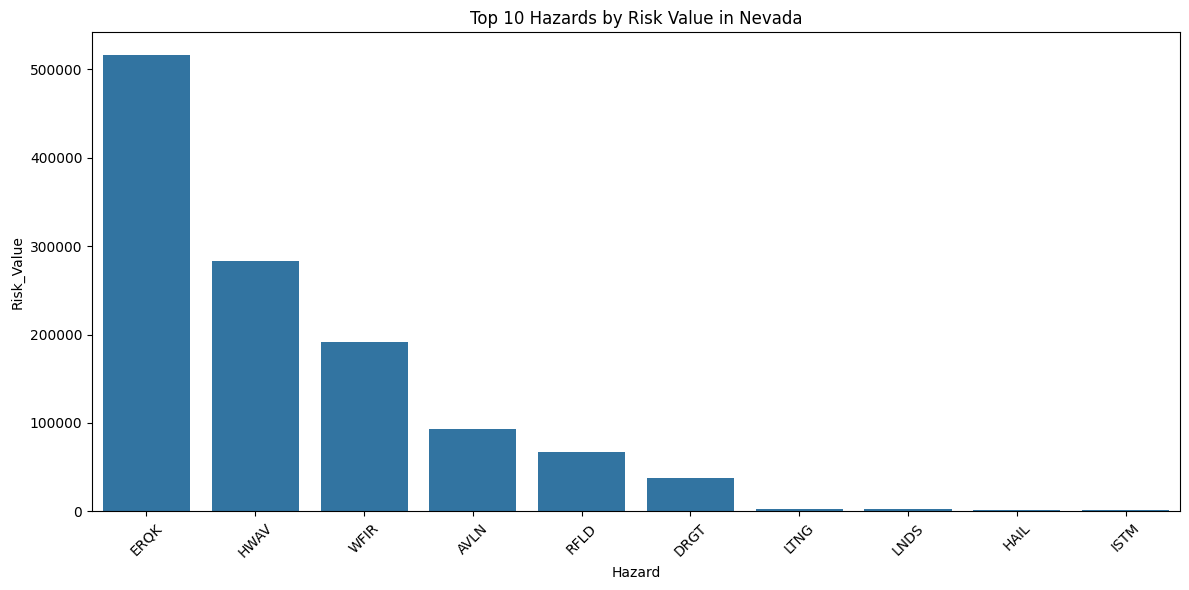

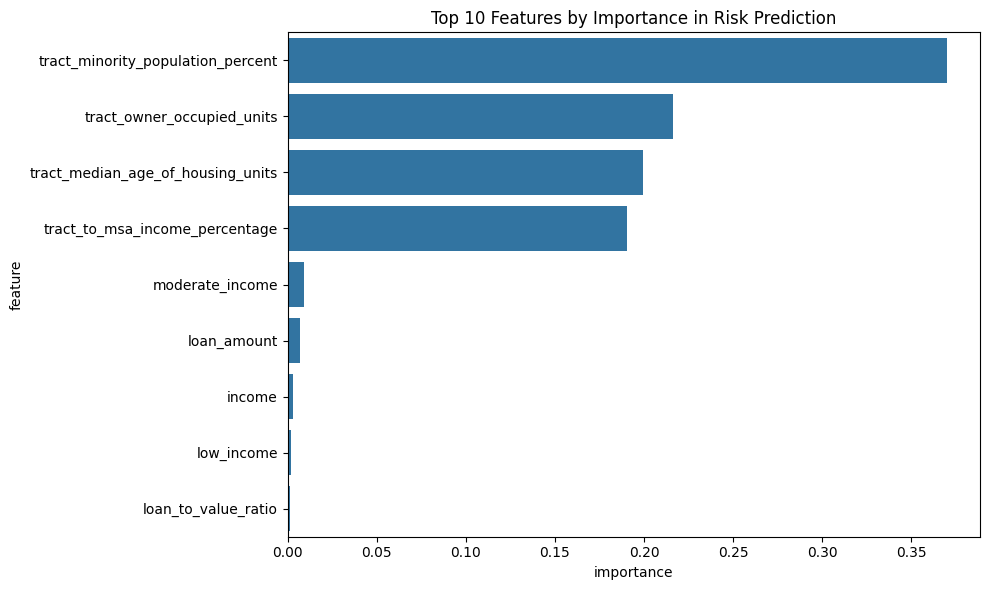

In [ ]:
# Create visualizations

# Add these imports at the beginning of your code (e.g., in cell 125 or before)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=hazard_results.head(10), x='Hazard', y='Risk_Value')
plt.title('Top 10 Hazards by Risk Value in Nevada')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=importance.head(10), x='importance', y='feature')
plt.title('Top 10 Features by Importance in Risk Prediction')
plt.tight_layout()
plt.show()